# 🖥️ Monitor Pipelines in PyLabFlow

This notebook helps you **track and compare running or completed experiments**.

In [ ]:
## 1 Setup the Lab
from plf.lab import lab_setup

# Use the full path to the settings JSON printed in setup.ipynb
lab_setup(settings_path='./PLF_Starter/PLF_Starter.json')

In [ ]:
## 2 Import Experiment Utilities
from plf.experiment import get_ppls, get_ppl_details, get_ppl_status, PipeLine, filter_ppls

In [ ]:
## 3 Quick Overview of All Pipelines
# Get a snapshot of the current status of all pipelines
get_ppl_status()

In [ ]:
# View the first-level configuration for all pipelines
get_ppl_details()

In [ ]:
## 4 Filter Pipelines by Component or Model

# Example: Find all pipelines that used the same model
qry = "model=my_models.Model1st"
filter_ppls(query=qry, params=True) # params=True shows the full argument configurations of matching pipelines

In [ ]:
## 5 Compare Training History Across Pipelines

import matplotlib.pyplot as plt
import pandas as pd

def compare(ppls):
    for i in ppls:
        P = PipeLine(pplid=i)
        df = pd.read_csv(P.get_path(of='history.history'))  # `of` refers to paths listed in your workflow
        df.loss.plot(label=i)
        plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Example: Compare pipelines p1 and p2
compare(ppls=['p1', 'p2'])

> Tip: You can **keep this notebook open while a workflow is running** in `experiment.ipynb` to watch progress in real time.
> make sure  you have used valid pplids  that u initiated in `experiment.ipynb`

# Archived

In [ ]:
from plf.lab import lab_setup
lab_setup(settings_path='.PLF_Starter/PLF_Starter.json')  # PUT FULL PATH from setup.ipynb

In [11]:
from plf.experiment import get_ppls, get_ppl_details, get_ppl_status, PipeLine, filter_ppls

In [ ]:
get_ppl_status() # as we  defined  in my_workflows.BasicWorkFlow.status  it  returns quick.  so this function collects  quick of all pplids

,epoch
p1,20
p2,20


In [ ]:
get_ppl_details() # it returns  the 1st level config( defined in my_workflows.BasicWorkFlow.template )  for al pplids

,dataset,model,batch_size
p1,my_datasets.MNISTDataset,my_models.Model1st,64
p2,my_datasets.MNISTDataset,my_models.Model1st,64


In [ ]:
qry = "model=my_models.Model1st" # it search for all  pplids that have  same model
filter_ppls(query=qry, params=True) # param=true   returns  the  dataframe of  all  arguments(we can see the difference if there is)

,conv_deep,dense_deep
p1,1,1
p2,4,1


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def compare(ppls):
    for i in ppls:
        P = PipeLine(pplid=i)
        df = pd.read_csv(P.get_path(of='history.history'))  #of shoul be listed in my_workflows.BasicWorkFlow.paths in __init__
        df.loss.plot(label=i)
        plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

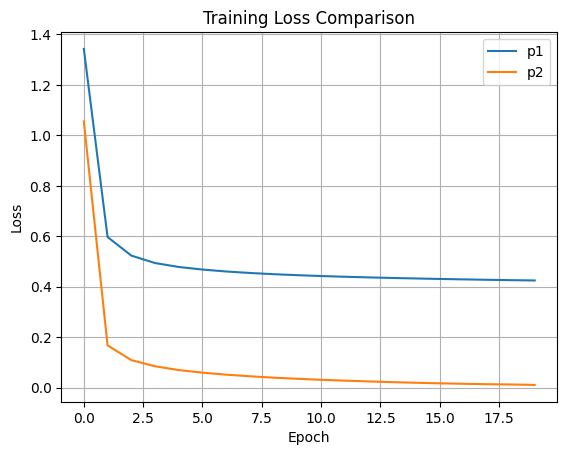

In [ ]:
compare(ppls=['p1', 'p2'])

In [28]:
P = PipeLine(pplid='p2')

In [29]:
import pandas as pd

In [30]:
P.get_path(of='history.history')

'/mnt/work/stdML/py310/py310/PLFdemo/Basic/PLF_Starter/history/history/p2.csv'

In [31]:
df = pd.read_csv(P.get_path(of='history.history'))
df

,epoch,loss
0,1,1.055206
1,2,0.167852
2,3,0.109437
3,4,0.084972
4,5,0.069951
5,6,0.059747
6,7,0.051778
7,8,0.045342
8,9,0.039821
9,10,0.035425


<Axes: >

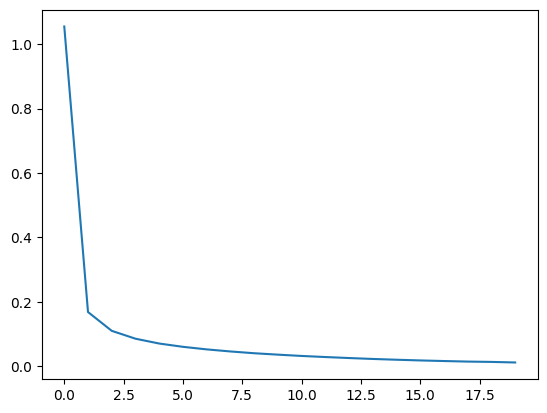

In [32]:
df.loss.plot()

In [ ]:
P.is_running() # if the respective pplid  is running in any file  it will return the log id 

'log5'

In [23]:
P.should_running

True

In [ ]:
P.stop_running() # if you want to stop running the pplid  where ever it is running
# otherwise it will run there  untill th ecriteria mate (  in our case  it will run till BasicWorkFlow.num_epochs see  the source code)

ppid:p2 will be stopped at logid:log5 after current iteration
